In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\ShibuKumar\AppData\Local\Temp\ipykernel_18976\1654069430.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.pandas.set_option("display.max_columns",None)

In [3]:
dataset = pd.read_csv(r"C:\Users\ShibuKumar\Downloads\data.csv")
dataset.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [4]:
dataset.shape

(169, 4)

In [6]:
dataset.columns

Index(['Duration', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

1.Handle missing values
2.Numerical values
3.distribution of numerical values
4.categorical values
5.outliers
6.relationship b/w independent and dependent features
7.correlation

In [7]:
dataset.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [9]:
dataset.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [10]:
#how to calculate null values
feat_with_nan = [i for i in dataset.columns if dataset[i].isnull().sum() >=1]
feat_with_nan

['Calories']

In [13]:
#calculate feat_with_nam mean value
dataset["Calories"].isnull().mean()

0.029585798816568046

In [15]:
#1.find missing value
for j in feat_with_nan:
    print(j,np.round(dataset[j].isnull().mean()*100,4),"% of mission values")

Calories 2.9586 % of mission values


In [16]:
#copy the data
data = dataset.copy()

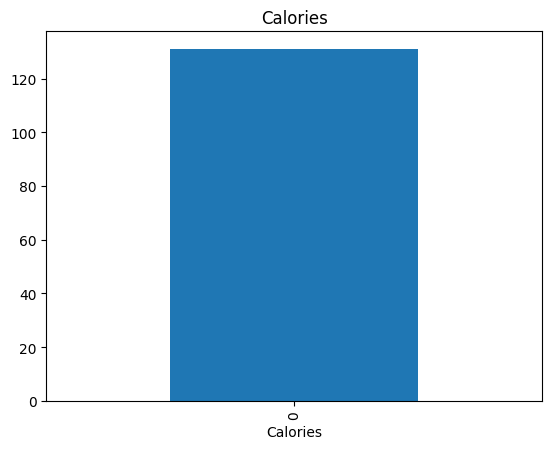

In [20]:
#plotting the features with missing data against the dependent variable
#replace all nan value with 1 and if no nan value, then 0
for k in feat_with_nan:
    data[k] = np.where(data[k].isnull(),1,0)
    data.groupby(k)["Maxpulse"].median().plot.bar()
    plt.title(k)
    plt.show()
    

<Axes: ylabel='Calories'>

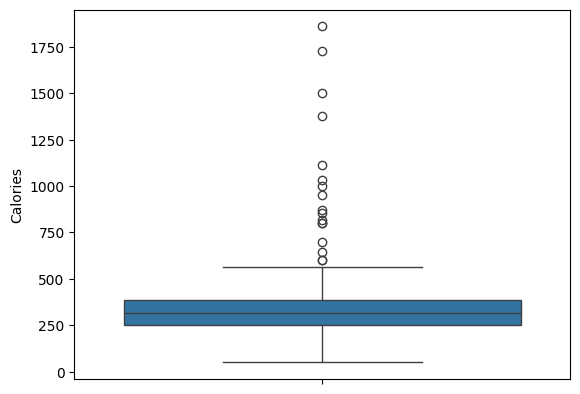

In [21]:
#find the outliers
sns.boxplot(dataset["Calories"])

In [25]:
#2.Numerical Variables
dataset.dtypes

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object

In [26]:
#find numerical features
numerical_features = [z for z in dataset.columns if dataset[z].dtypes !="o"]
numerical_features

['Duration', 'Pulse', 'Maxpulse', 'Calories']

In [ ]:
#temporal variable - data time variables
